## PROCESSAMENTO DE IMAGENS
**Checkpoint 5 - 2021**

Grupo:
*   Élida Coelho da Silva RM: 85599
*   CAROLINA GOMES DA SILVA RM: 85183

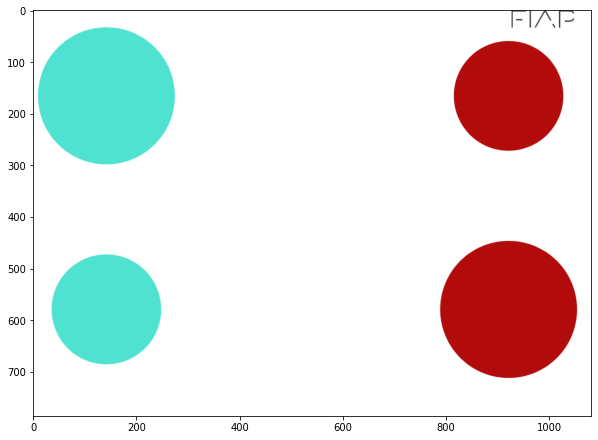

In [233]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('circulo.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (10,10))
plt.imshow(img); plt.show()

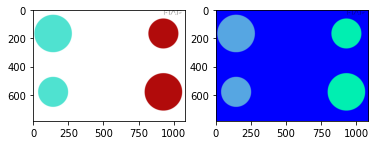

In [234]:
img = cv2.imread('circulo.png')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.subplot(1, 2, 2)
plt.imshow(img_hsv)
plt.show()

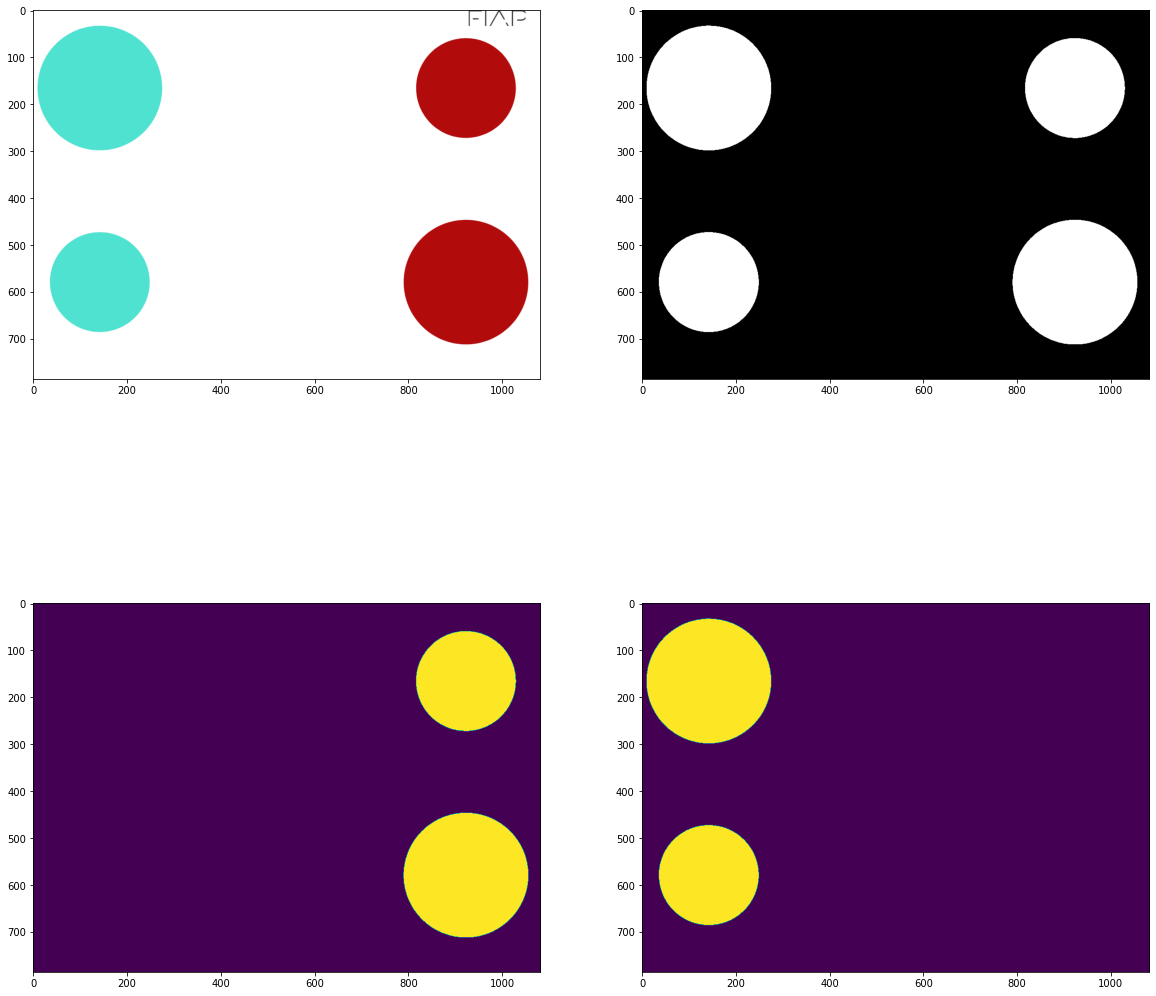

In [235]:
#Implemente seu código
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('circulo.png')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)




# DEFININDO A MASCARA PARA A AVERMELHADA
image_lower_hsv1 = np.array([0, 50, 100])  
image_upper_hsv1 = np.array([10, 255, 255])
# APLICANDO A MASCARA 
mask_hsv1 = cv2.inRange(img_hsv, image_lower_hsv1, image_upper_hsv1)

# PARA O VERMELHO PEGAMOS A PARTE ALTA DO FILTRO
# DEFININDO A MASCARA PARA o CIAN
image_lower_hsv2 = np.array([80, 50, 100])  
image_upper_hsv2 = np.array([105, 255, 255])
# APLICANDO A MASCARA 
mask_hsv2 = cv2.inRange(img_hsv, image_lower_hsv2, image_upper_hsv2)

saida = cv2.bitwise_or(mask_hsv1,mask_hsv2)


fig = plt.figure(figsize=(20,20))
plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.subplot(2, 2, 2)
plt.imshow(saida, cmap="gray", vmin=0, vmax=255)
plt.subplot(2, 2, 3)
plt.imshow(mask_hsv1)
plt.subplot(2, 2, 4)
plt.imshow(mask_hsv2)
plt.show()

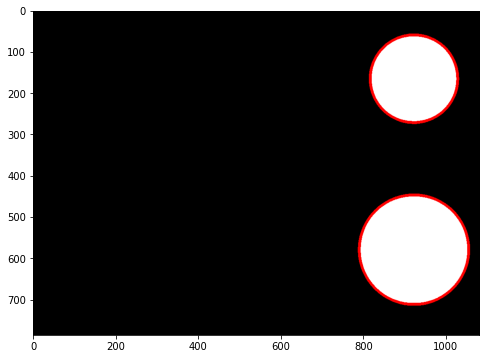

In [236]:
# realizando o contorno da imagem Vermelho

contornosRed, _ = cv2.findContours(mask_hsv1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

# para desenhar o contorno primeiro faz uma copia da imagem 
contornosRed, _ = cv2.findContours(mask_hsv1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
mask_rgb = cv2.cvtColor(mask_hsv1, cv2.COLOR_GRAY2RGB) 
contornos_img_red = mask_rgb.copy() # Cópia da máscara para ser desenhada "por cima"

cv2.drawContours(contornos_img_red, contornosRed, -1, [255, 0, 0], 5);

plt.figure(figsize=(8,6))
plt.imshow(contornos_img_red);

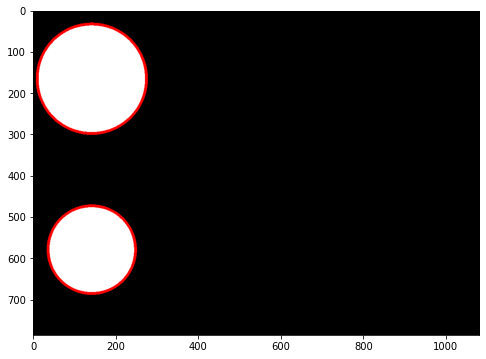

In [237]:
# realizando o contorno da imagem Ciano

contornosCian, _ = cv2.findContours(mask_hsv2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

# para desenhar o contorno primeiro faz uma copia da imagem 
contornosCian, _ = cv2.findContours(mask_hsv2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
mask_rgb = cv2.cvtColor(mask_hsv2, cv2.COLOR_GRAY2RGB) 
contornos_img_cian = mask_rgb.copy() # Cópia da máscara para ser desenhada "por cima"

cv2.drawContours(contornos_img_cian, contornosCian, -1, [255, 0, 0], 5);

plt.figure(figsize=(8,6))
plt.imshow(contornos_img_cian);

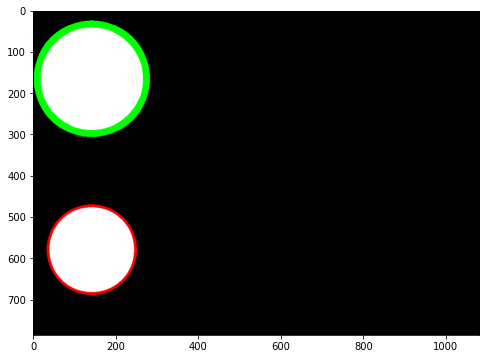

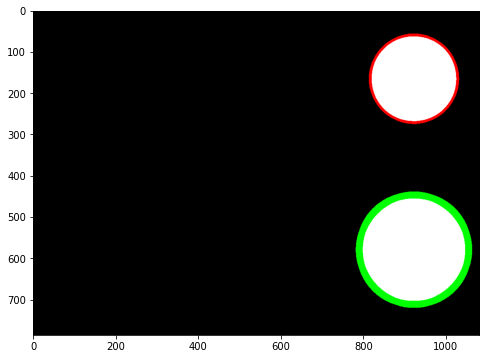

In [238]:
## Implemente seu código

maior = None
maior_area = 0
maior2 = None
maior_area2 = 0
for c in contornosRed:
    area = cv2.contourArea(c)
    if area > maior_area:
        maior_area = area
        maior = c
for a in contornosCian:
    area = cv2.contourArea(a)
    if area > maior_area2:
        maior_area2 = area
        maior2 = a

cv2.drawContours(contornos_img_red, [maior], -1, [0, 255, 0], 15)
cv2.drawContours(contornos_img_cian, [maior2], -1, [0, 255, 0], 15)


plt.figure(figsize=(8,6))
plt.imshow(contornos_img_cian)

plt.figure(figsize=(8,6))
plt.imshow(contornos_img_red)


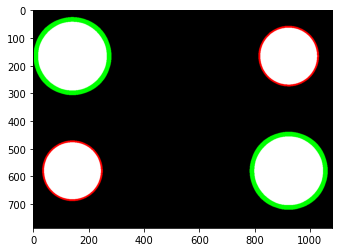

In [239]:
saida = cv2.bitwise_or(contornos_img_cian,contornos_img_red)
plt.imshow(saida)
plt.show()

In [240]:
cntCian = contornosCian[1]

MCian = cv2.moments(cntCian)
print( MCian )

{'m00': 55067.0, 'm10': 7814265.0, 'm01': 9126168.5, 'm20': 1350134779.8333333, 'm11': 1294970083.75, 'm02': 1753834728.3333333, 'm30': 260065113981.5, 'm21': 223734205935.75, 'm12': 248847636528.58334, 'm03': 370663649525.25, 'mu20': 241254007.4973607, 'mu11': -75934.62130236626, 'mu02': 241368977.6951604, 'mu30': 4525078.399261475, 'mu21': 13915.804481506348, 'mu12': -4549882.546669006, 'mu03': -72380.0521850586, 'nu20': 0.07955943712510263, 'nu11': -2.5041307258658403e-05, 'nu02': 0.07959735137290308, 'nu30': 6.359127975020306e-06, 'nu21': 1.955598859628654e-08, 'nu12': -6.393985436871466e-06, 'nu03': -1.0171625197887306e-07}


In [241]:
cntRed = contornosRed[0]

MRed = cv2.moments(cntRed)
print( MRed)

{'m00': 55095.0, 'm10': 50782914.0, 'm01': 31907831.5, 'm20': 47050064089.166664, 'm11': 29410417849.25, 'm02': 18720536091.0, 'm30': 43813273566752.0, 'm21': 27248479650213.918, 'm12': 17255228884594.584, 'm03': 11121424352222.75, 'mu20': 241744743.82868195, 'mu11': -103304.95620727539, 'mu02': 241368997.20941544, 'mu30': -1020892.015625, 'mu21': -697692.7384338379, 'mu12': 971555.6945800781, 'mu03': 742714.43359375, 'nu20': 0.07964025929445118, 'nu11': -3.403272959919971e-05, 'nu02': 0.079516473528881, 'nu30': -1.432845416330278e-06, 'nu21': -9.792277997784385e-07, 'nu12': 1.363600755400554e-06, 'nu03': 1.0424167840764556e-06}


In [242]:
# Calculo das coordenadas do centro de massa

cxRed = int(MRed['m10']/MRed['m00'])
cyRed = int(MRed['m01']/MRed['m00'])

print("centro de massa na possição: ",cxRed, cyRed)

centro de massa na possição:  921 579


In [243]:
# Calculo das coordenadas do centro de massa

cxCian = int(MCian['m10']/MCian['m00'])
cyCian = int(MCian['m01']/MCian['m00'])

print("centro de massa na possição: ",cxCian, cyCian)

centro de massa na possição:  141 165


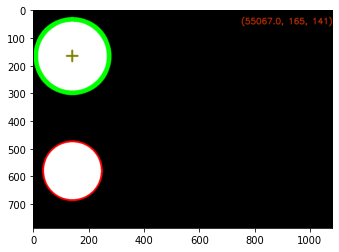

In [244]:
## para desenhar a cruz vamos passar a cor e o tamanho em pixel
size = 20
color = (128,128,0)


cv2.line(contornos_img_cian,(cxCian - size,cyCian),(cxCian + size,cyCian),color,5)
cv2.line(contornos_img_cian,(cxCian,cyCian - size),(cxCian, cyCian + size),color,5)

# Para escrever vamos definir uma fonte 

font = cv2.FONT_HERSHEY_SIMPLEX
text = maior_area2, cyCian , cxCian
origem = (750,50)

cv2.putText(contornos_img_cian, str(text), origem, font,1,(200,50,0),2,cv2.LINE_AA)


plt.imshow(contornos_img_cian);

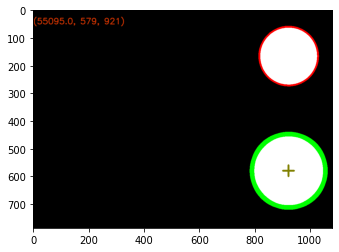

In [245]:
## para desenhar a cruz vamos passar a cor e o tamanho em pixel
size = 20
color = (128,128,0)


cv2.line(contornos_img_red,(cxRed - size,cyRed),(cxRed + size,cyRed),color,5)
cv2.line(contornos_img_red,(cxRed,cyRed - size),(cxRed, cyRed + size),color,5)

# Para escrever vamos definir uma fonte 

font = cv2.FONT_HERSHEY_SIMPLEX
text = maior_area, cyRed , cxRed
origem = (0,50)

cv2.putText(contornos_img_red, str(text), origem, font,1,(200,50,0),2,cv2.LINE_AA)


plt.imshow(contornos_img_red);

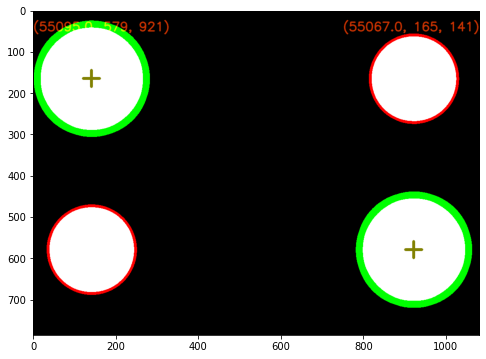

In [246]:
saida = cv2.bitwise_or(contornos_img_cian,contornos_img_red)
plt.figure(figsize=(8,6))
plt.imshow(saida)
plt.show()

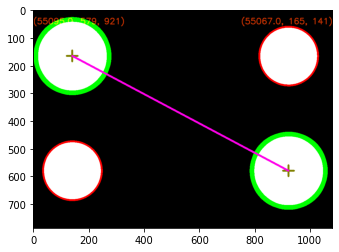

In [264]:
color = (255, 0, 234)

cv2.line(saida,(cxCian , cyCian),(cxRed , cyRed),color,5)
plt.imshow(saida)
plt.show()

In [266]:
import math
p_interno = (cxCian*cxRed)+(cyCian*cyRed)
modulo_cian= math.sqrt(((cxCian**2) + (cyCian**2)))
modulo_red = math.sqrt(((cxRed**2) + (cyRed**2)))
angulo= angulo_part1/(angulo_part2*angulo_part3)

angulo_final= math.acos(angulo) 
final= math.degrees(angulo_final)
print("Valor do angulo entre as retas", final)

Valor do angulo entre as retas 17.32848885642666


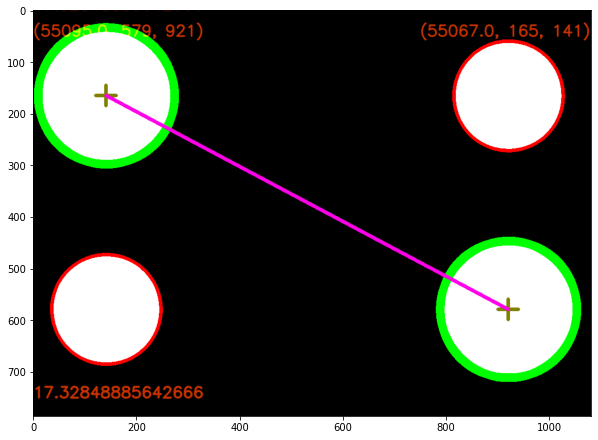

In [271]:
color = (255, 0, 234)
font = cv2.FONT_HERSHEY_SIMPLEX
text = final
origem = (0,750)
cv2.putText(saida, str(text), origem, font,1,(200,50,0),2,cv2.LINE_AA)
cv2.line(saida,(cxCian , cyCian),(cxRed , cyRed),color,5)
fig = plt.figure(figsize=(10,10))
plt.imshow(saida)
plt.show()